In [146]:
import csv
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt



file_name= "full-data.csv"


lr = LinearRegression()
ite = 0
def plotgraph(X,y, name, pred):
    name = name.capitalize()
    title = "Fig 1.3 Linear Regression for " + name + " vs Sleep"
    set_matplotlib_formats('svg')
    # if name == "year standing":
    #     plt.plot(X, y, 'o')
    #     plt.plot(X, pred)
    #     plt.xlabel('Year Standing')
    # else:
    plt.figure()
    plt.scatter(X,y, color='#495867',  label = "Actual")
    plt.plot(X, pred, color='#FE5F55', label = "Best fit")
    plt.xlabel(name)
    plt.style.use('seaborn')
    plt.grid(False)
    plt.title(title)
    plt.ylabel('Sleep')
    plt.legend()
    plt.savefig("./graphs/" + name + ".png", dpi = 300, bbox_inches='tight')

def fitdata(X,y, name):
    samples = X.shape[0]
    dof = X.shape[1]
    lr.fit(X, y)
    c = lr.intercept_
    m = lr.coef_
    r2 = r2_score(y, lr.predict(X))
    adjr2 = 1 - (1 - r2) * (samples - 1) / (samples - dof - 1)
    if name != "All":
        plotgraph(X,y, name, lr.predict(X))
    # else:
    #     # write values of column and c[i] to csv
    #     with open('readings.csv', 'w', encoding='UTF8') as f:
    #         writer = csv.writer(f)
    #         writer.writerow(["Column name", "Intercept", "Coefficients", "R2", "Adj R2"])
    #         for i in range(len(X.columns)):
    #             writer.writerow([X.columns[i], m[i]])
    if len(m) == 1:
       m=m[0]
    return [c, m, r2, adjr2]


df = pd.read_csv(file_name)
cat_variables = ["gender", "ethnicity", "major"]


for st in cat_variables:
    df[st] = df[st].astype("category")
    df[st] = df[st].cat.codes







/var/folders/73/zk3nvhcs151155h_b2c87b_c0000gn/T/ipykernel_12642/1098340783.py:17: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')
/var/folders/73/zk3nvhcs151155h_b2c87b_c0000gn/T/ipykernel_12642/1098340783.py:27: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
/var/folders/73/zk3nvhcs151155h_b2c87b_c0000gn/T/ipykernel_12642/1098340783.py:17: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')
/var/folders/73/zk3nvhcs151155h_b2c87b_c0000gn/T/ipykernel_12642/1098340783.py:2

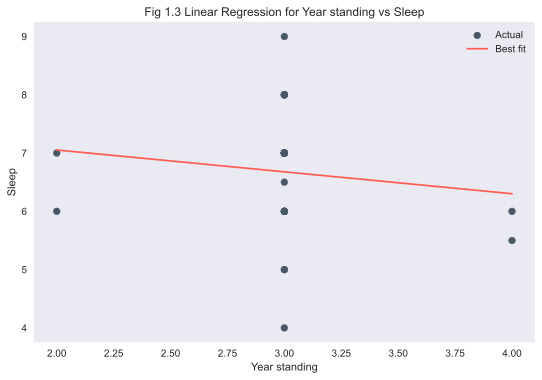

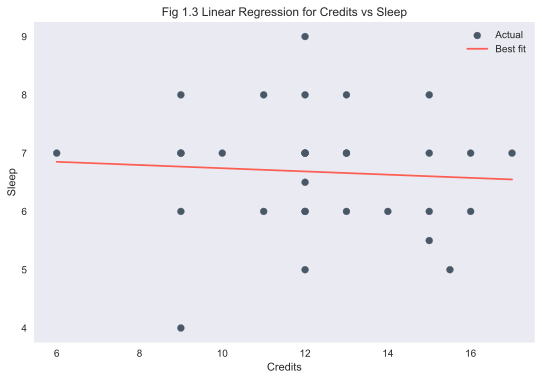

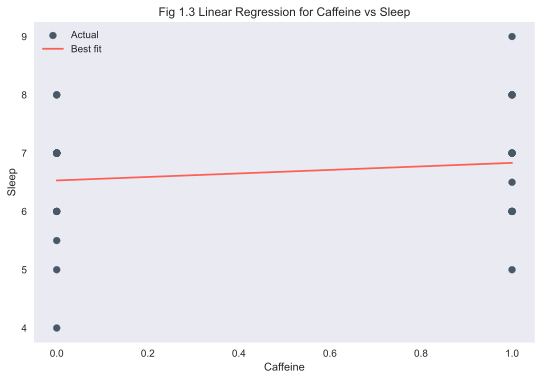

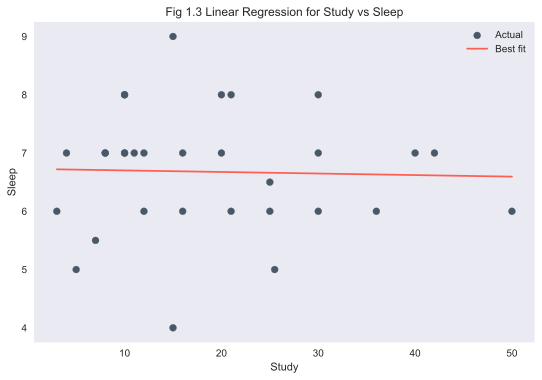

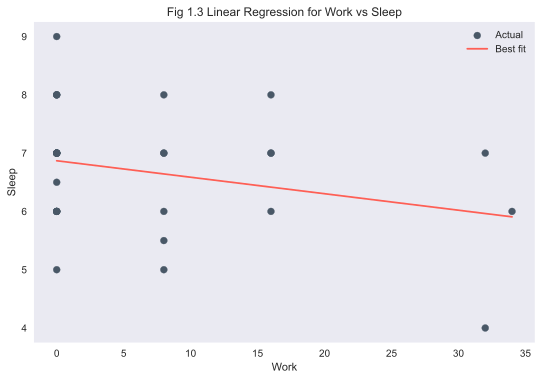

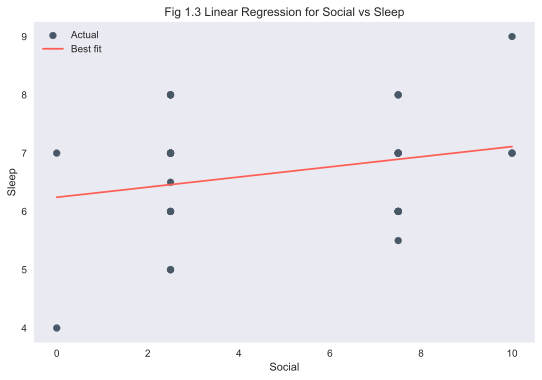

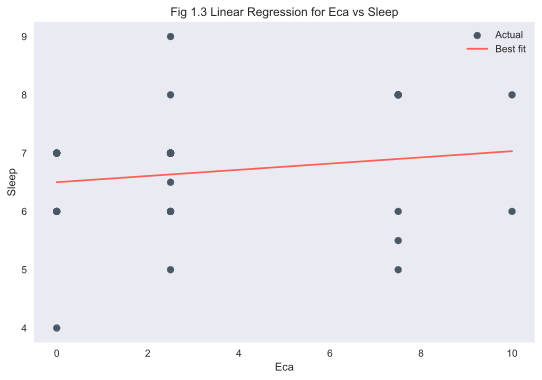

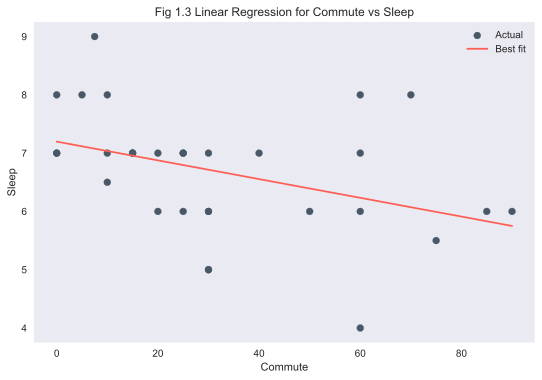

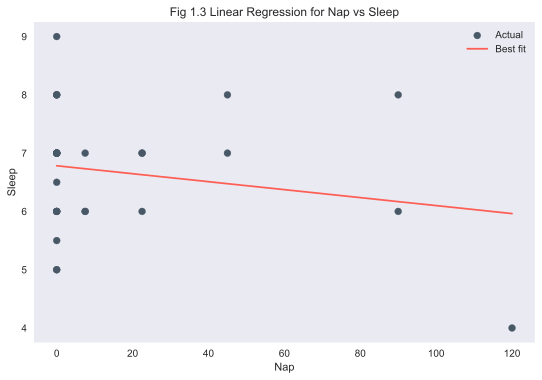

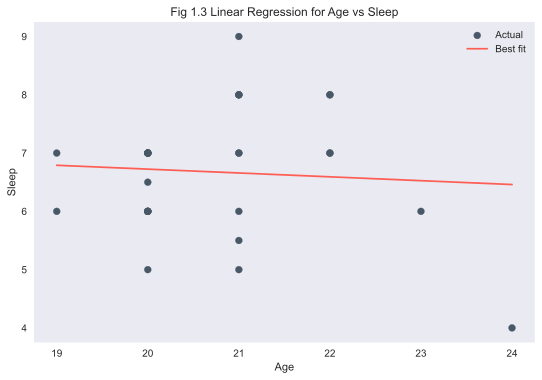

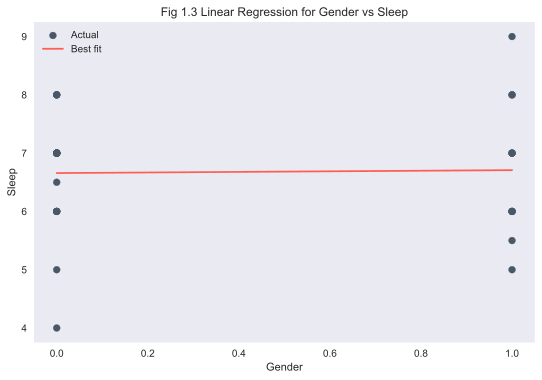

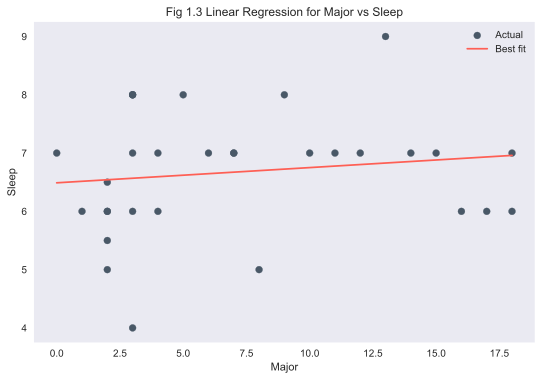

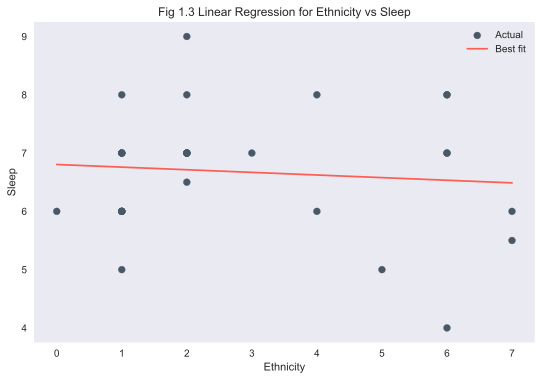

In [147]:
if df.isnull().sum().sum() != 0:
    raise Exception("Data contains null values. Can't proceed with linear regression")

X = df.drop(columns=["sleep"])
y = df["sleep"]



with open('readings.csv', 'w', encoding='UTF8') as f:
    writer = csv.writer(f)
    writer.writerow(["Column name", "Intercept", "Coefficients", "R2", "Adj R2"])

    for column in X.columns:
        row= [column] + fitdata(X[column].values.reshape(-1,1), y, column)
        writer.writerow(row)
    fitdata(X,y, "All")